In [1]:
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

california_housing_df = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv',sep=',')

california_housing_df = california_housing_df.reindex(
    np.random.permutation(california_housing_df.index))
california_housing_df

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13416,-121.94,37.30,26.0,4348.0,814.0,2347.0,810.0,4.7275,293000.0
12679,-121.76,37.68,35.0,1864.0,357.0,1189.0,349.0,4.2361,177500.0
1553,-117.22,34.12,30.0,2512.0,597.0,1390.0,523.0,2.3725,77200.0
13476,-121.95,36.61,31.0,1736.0,250.0,497.0,170.0,6.3835,407800.0
5012,-118.11,33.82,36.0,1999.0,390.0,887.0,379.0,3.8162,221900.0
4536,-118.05,34.07,32.0,4492.0,1075.0,4119.0,1035.0,3.2373,183100.0
1806,-117.26,32.95,15.0,1882.0,233.0,704.0,219.0,6.9794,500001.0
14383,-122.11,37.31,7.0,189.0,26.0,84.0,29.0,13.8093,500001.0
5371,-118.15,34.02,37.0,2344.0,631.0,2195.0,610.0,2.7022,151900.0
3981,-117.96,33.72,23.0,3929.0,559.0,1858.0,538.0,6.8645,318200.0


In [3]:
def preprocess_features(california_housing_df):
    selected_features = california_housing_df[
        [
            'latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income'
        ]
    ]
    processed_features = selected_features.copy()
    #Crete synthetic feature
    processed_features['rooms_per_person'] = california_housing_df['total_rooms'] / california_housing_df['population']
    
    return processed_features

def preprocess_targets(california_housing_df):
    output_targets = pd.DataFrame()
    output_targets['median_house_value_is_high'] = (
        california_housing_df['median_house_value'] > 265000).astype(float)
    return output_targets

In [4]:
training_examples = preprocess_features(california_housing_df.head(12000))
training_targets = preprocess_targets(california_housing_df.head(12000))

validation_examples = preprocess_features(california_housing_df.tail(5000))
validation_targets = preprocess_targets(california_housing_df.tail(5000))

display.display(training_examples.describe())
display.display(training_targets.describe())
display.display(validation_examples.describe())
display.display(validation_targets.describe())

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,35.627403,-119.568232,28.617667,2643.386917,539.227000,1431.578417,501.811083,3.894990,1.976851
std,2.135604,2.002512,12.626986,2182.739853,419.642009,1143.593900,383.593007,1.925186,1.171207
min,32.550000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.018065
25%,33.930000,-121.790000,18.000000,1465.000000,298.000000,792.000000,282.750000,2.564300,1.521790
50%,34.250000,-118.500000,29.000000,2129.000000,435.000000,1167.000000,410.000000,3.548600,1.945086
75%,37.720000,-118.010000,37.000000,3148.250000,648.250000,1724.000000,603.000000,4.775000,2.301010
max,41.950000,-114.310000,52.000000,37937.000000,5471.000000,35682.000000,5189.000000,15.000100,55.222222


,median_house_value_is_high
count,12000.000000
mean,0.253417
std,0.434986
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35.619996,-119.547412,28.521400,2644.330400,539.852000,1424.763200,499.808000,3.856189,1.990782
std,2.141704,2.011647,12.491291,2173.447525,425.966175,1158.111609,386.773392,1.866558,1.164352
min,32.540000,-124.300000,1.000000,12.000000,3.000000,8.000000,6.000000,0.499900,0.104410
25%,33.930000,-121.780000,18.000000,1454.000000,294.750000,782.000000,279.000000,2.572825,1.522441
50%,34.240000,-118.470000,28.000000,2125.000000,429.000000,1167.500000,407.000000,3.531300,1.934102
75%,37.710000,-117.980000,37.000000,3161.500000,648.250000,1715.250000,607.000000,4.740250,2.291472
max,41.880000,-114.560000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,41.333333


,median_house_value_is_high
count,5000.000000
mean,0.241200
std,0.427854
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

def my_input_function(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #Convert pandas data into a dict of np array
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    #Construct a dataset and configure batch repeat
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #Shuffle the data if specified
    if shuffle:
        ds=ds.shuffle(10000)
    #return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [ ]:
def train_linear_regressor_model(learning_rate, steps, batch_size, training_examples, training_targets, validation_examples, validation_targets):
    periods=10
    steps_per_period = steps / periods
    
    #Create a regressor object
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=my_optimizer)
    
    #Create input function
    training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value_is_high'], batch_size=batch_size)
    predict_training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
    predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
    
    #Train the model
    print('Training Model....')
    print('RMSE on training data: ')
    
    training_rmse = []
    validation_rmse = []
    
    for period in range(0, periods):
        #Train the model
        linear_regressor.train(input_fn=training_input_function, steps=steps_per_period)
        
        #Compute predictions
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_function)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_function)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
        
        #Compute loss
        training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions, validation_targets))
        
        print(' period %02d: %0.2f' % (period, training_root_mean_squared_error))
        
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
        
    print('Model training Finished!!!')
    
    
    #Output graph
    plt.xlabel('Periods')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Periods')
    plt.tight_layout()
    plt.plot(training_rmse, label='training')
    plt.plot(validation_rmse, label='validation')
    plt.legend()
    plt.show()
    
    return linear_regressor

In [ ]:
linear_regressor = train_linear_regressor_model(
    learning_rate=0.000001,
    steps=200,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets
)

In [6]:
def train_linear_classifier_model(learning_rate, steps, batch_size, training_examples, training_targets, validation_examples, validation_targets):
    periods=10
    steps_per_period = steps / periods
    
    #Create a linear classifier object
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_classifier = tf.estimator.LinearClassifier(feature_columns=construct_feature_columns(training_examples),
                                                      optimizer=my_optimizer)
    
    #Create input function
    training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value_is_high'], batch_size=batch_size)
    predict_training_input_function = lambda: my_input_function(training_examples, training_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
    predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
    
    #Train the model
    print('Training Model....')
    print('LogLoss on training data: ')
    
    training_log_losses = []
    training_rsme = []
    validation_log_losses = []
    validation_rsme = []
    
    for period in range(0, periods):
        #Train the model
        linear_classifier.train(input_fn=training_input_function, steps=steps_per_period)
        
        #Compute predictions (logloss and RSME)
        training_probabilities = linear_classifier.predict(input_fn=predict_training_input_function)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
        validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_function)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
        
        training_predictions = linear_classifier.predict(input_fn=predict_training_input_function)
        training_predictions = np.array([item['probabilities'][0] for item in training_predictions])
        validation_predictions = linear_classifier.predict(input_fn=predict_validation_input_function)
        validation_predictions = np.array([item['probabilities'][0] for item in validation_predictions])
        
        #Compute loss
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        
        training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions, validation_targets))
        
        print(' period %02d: %0.2f' % (period, training_log_loss))
        print(' period %02d: %0.2f' % (period, validation_log_loss))
        print(' period %02d: %0.2f' % (period, training_root_mean_squared_error))
        print(' period %02d: %0.2f' % (period, validation_root_mean_squared_error))
        
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
        training_rsme.append(training_root_mean_squared_error)
        validation_rsme.append(validation_root_mean_squared_error)
        
    print('Model training Finished!!!')
    
    
    #Output graph
    plt.xlabel('Periods')
    plt.ylabel('Logloss and RSME')
    plt.title('Logloss and RSME vs Periods')
    plt.tight_layout()
    plt.plot(training_log_losses, label='Log_loss_training')
    plt.plot(validation_log_losses, label='Log_loss_validation')
    plt.plot(training_rsme, label='RSME_training')
    plt.plot(validation_rsme, label='RSME_validation')
    plt.legend()
    plt.show()
    
    return linear_classifier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B00B88A710>, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_num_worker_replicas': 1, '_service': None, '_task_id': 0, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_session_config': None, '_num_ps_replicas': 0, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpajhix9_9', '_log_step_count_steps': 100, '_master': '', '_save_checkpoints_steps': None}
Training Model....
LogLoss on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpajhix9_9\model.ckpt.
INFO:tensorflow:step = 1, loss = 13.862944
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpajhix9_9\model.ckpt.
INFO:tensorflow:Loss for final 

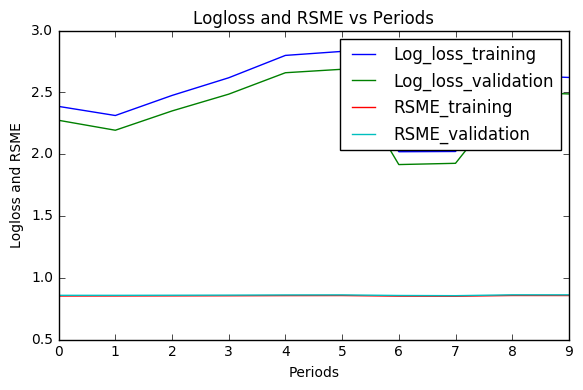

In [7]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.001,
    steps=500,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B27C20AE48>, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_num_worker_replicas': 1, '_service': None, '_task_id': 0, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_session_config': None, '_num_ps_replicas': 0, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpxnjmiofa', '_log_step_count_steps': 100, '_master': '', '_save_checkpoints_steps': None}
Training Model....
LogLoss on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpxnjmiofa\model.ckpt.
INFO:tensorflow:step = 1, loss = 13.862944
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpxnjmiofa\model.ckpt.
INFO:tensorflow:Loss for final 

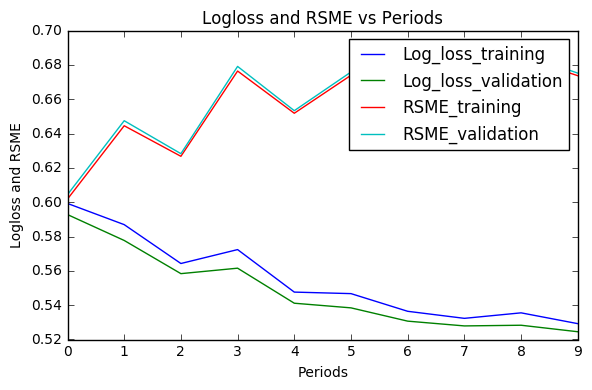

In [8]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000005,
    steps=500,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Calculate Accuracy and plot ROC curve for validation set

In [13]:
predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_function)

print('AUC on the validation set: %0.2f' % evaluation_metrics['auc'])
print('Accuracy on the validation set: %0.2f' % evaluation_metrics['accuracy'])

INFO:tensorflow:Starting evaluation at 2018-05-02-13:26:19
INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmpxnjmiofa\model.ckpt-500
INFO:tensorflow:Finished evaluation at 2018-05-02-13:26:38
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.7672, accuracy_baseline = 0.7588, auc = 0.732741, auc_precision_recall = 0.43072084, average_loss = 0.5245212, global_step = 500, label/mean = 0.2412, loss = 0.5245212, prediction/mean = 0.30390027
AUC on the validation set: 0.73
Accuracy on the validation set: 0.77


INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmpxnjmiofa\model.ckpt-500


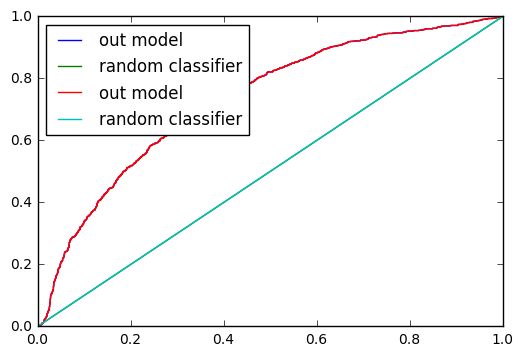

In [22]:
predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_function)
#Get just the probabilities for the positive class
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)

plt.plot(false_positive_rate, true_positive_rate, label='out model')
plt.plot([0,1], [0,1], label='random classifier')
plt.legend(loc=2)
plt.show()

In [23]:
tf.reset_default_graph()

In [ ]:
predict_validation_input_function = lambda: my_input_function(validation_examples, validation_targets['median_house_value_is_high'], shuffle=False, num_epochs=1)
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000003,
    steps=20000,
    batch_size=500,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print ("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print ("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B00D765748>, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_num_worker_replicas': 1, '_service': None, '_task_id': 0, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_session_config': None, '_num_ps_replicas': 0, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpyqgsefw9', '_log_step_count_steps': 100, '_master': '', '_save_checkpoints_steps': None}
Training Model....
LogLoss on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
